In [813]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

# Importemos los datos de Market Cap y veamos cómo se ven

In [4]:
data = pd.read_excel('market_cap.xlsx')
data.head(10)

,Ranking,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,GE,GE,Microsoft,GE,GE,Exxon,Exxon,Petrochina,Exxon,Petrochina,Exxon,Exxon,Apple,Apple,Apple,Apple,Apple,Apple,Microsoft
1,2,Cisco,Microsoft,GE,Microsoft,Exxon,GE,GE,Exxon,PetroChina,Exxon,PetroChina,Apple,Exxon,Exxon,Exxon,Google,Google,Google,Apple
2,3,Exxon,Exxon,Exxon,Exxon,Microsoft,Microsoft,Microsoft,GE,Wal-Mart,Microsoft,Apple,PetroChina,PetroChina,Microsoft,Microsoft,Microsoft,Microsoft,Microsoft,Amazon
3,4,Pfizer,Wal-Mart,Wal-Mart,Pfizer,Citigroup,Citigroup,Citigroup,China Mobile,China Mobile,ICBC,BHP,Royal Dutch Shell,BHP,Google,Berkshire Hathaway,Berkshire Hathaway,Berkshire Hathaway,Amazon,Google
4,5,Microsoft,Citigroup,Pfizer,Citigroup,BP,BP,Gazprom,ICBC,P&G,Wal-Mart,Microsoft,ICBC,ICBC,Berkshire Hathaway,Google,Exxon,Exxon,Facebook,Berkshire Hathaway
5,6,Wal-Mart,Pfizer,Citigroup,Wal-Mart,Wal-Mart,Bank of America,ICBC,Microsoft,ICBC,China Construction Bank,ICBC,Microsoft,China Mobile,GE,PetroChina,Amazon,Amazon,Tencent,Tencent
6,7,Citigroup,Intel,J&J,AIG,Royal Dutch Shell,Royal Dutch Shell,Toyota,Gazprom,Microsoft,BHP,Petrobras,IBM,Wal-Mart,J&J,J&J,GE,J&J,Berkshire Hathaway,Facebook
7,8,Vodafone,BP,Royal Dutch Shell,Intel,J&J,Wal-Mart,Bank of America,Royal Dutch Shell,ATT,HSBC,China Construction Bank,Chevron,Samsung,Wal-Mart,Wells Fargo,J&J,JPMorgan,Alibaba,Alibaba
8,9,Intel,J&J,BP,BP,Pfizer,Toyota,Royal Dutch Shell,ATT,J&J,Petrobras,Royal Dutch Shell,Wal-Mart,Microsoft,Hoffmann-La Roche,Wal-Mart,Wells Fargo,GE,J&J,J&J
9,10,Royal Dutch Shell,Royal Dutch Shell,IBM,HSBC,Bank of America,Gazprom,BP,Sinopec,GE,Apple,Nestlé,China Mobile,Royal Dutch Shell,Chevron,ICBC,JPMorgan,Wells Fargo,JPMorgan,JPMorgan


In [9]:
# Muchos nombres se repiten: busquemos los nombres únicos
names_df = pd.DataFrame(data.iloc[:,1:].stack().value_counts().index).rename(columns={0:'names'}).sort_values(by='names')
names_2018 = data[2018]

# Empecemos con la gráfica que les mostré en la primera sesión

## Tema:
Top 10 de empresas por _market capitalization_

### Objetivos:
1. Haciendo énfasis en las empresas que aparecieron en el top 10 de 2018
2. Mostrar la evolución (entradas, salidas, subidas y bajadas) del ránking de cada empresa desde 2000 hasta 2018
3. Quiero mostrar que las empresas tecnológicas (revolución Big Data) entraron hace poco y ocupan varios de los lugares en 2018


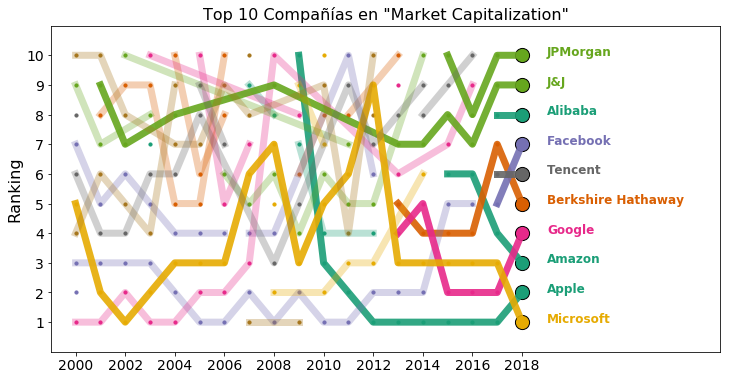

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
# quiero hacer un loop sobre colores que depena del total de empresas únicas del listado (guardado en names_df)
color_idx = np.linspace(0, 1, names_df.shape[0]*6)
# Estrategia: voy a construir un gráfico de líneas para cada nombre de empresas que aparece: empiezo loop
for j, name in enumerate(names_df.names):
    # para resaltar las empresas de 2018 cambio transparencia de este año
    if name in names_2018.values:
        alpha=0.9
    else:
        alpha=0.3
    # Para el loop de colores, uso el colormap DARK2 (si hacen dir(plt.cm) encuentran todos los posibles cmaps)
    color = plt.cm.Dark2(color_idx[j*6])
    # Para cada nombre quiero guardar los años (cols) y su ranking (ix) en el que aparecieron
    list_cols = []
    list_ix = []
    # empiezo loop sobre los años: me salto la primera que trae el ranking, lo puedo sustituir por el index del DF
    for cols in data.columns[1:]:
        # boolean para seleccionar índice
        ind_bool = data[cols]== name
        # si encuentro el nombre, entonces lo agrego a las listas que inicialcé antes del loop
        if ind_bool.sum()>0:
            list_cols.append(cols)
            ix_bool = data.index[ind_bool][0] + 1
            list_ix.append(ix_bool)
    # una vez termino con todas las columnas (años) puedo hacer el gráfico correspondiente para esta empresa
    # es una combinación de un scatterplot y uno de líneas
    for i in range(len(list_cols)):
        ax.scatter(list_cols[i], list_ix[i], marker = 'o',color=color,s=10)
        if list_cols[i] == 2018:
            ax.text(list_cols[i]*1.0005, list_ix[i], name, horizontalalignment='left', fontsize=12, weight='bold',
                   color=color)
            ax.scatter(list_cols[i], list_ix[i], marker = 'o',color=color, s=200, edgecolor='k')
    ax.plot(list_cols, list_ix,color=color, alpha=alpha, linewidth=7)
plt.axis([1999,2026,0,11])
plt.xticks(np.arange(2000,2019)[::2],np.arange(2000,2019)[::2], fontsize=14)
plt.yticks(np.arange(1,11), fontsize=14)
plt.title(u'Top 10 Compañías en "Market Capitalization"', fontsize=16)
plt.ylabel(u'Ranking', fontsize=16)
print('')
#fig.savefig('market_cap.png')

# Qué otras alternativas tenemos para visualizar estos datos?

## Por ejemplo, busquemos una alternativa que sólo muestre los cambios de 2000-2018

## Slopegraph

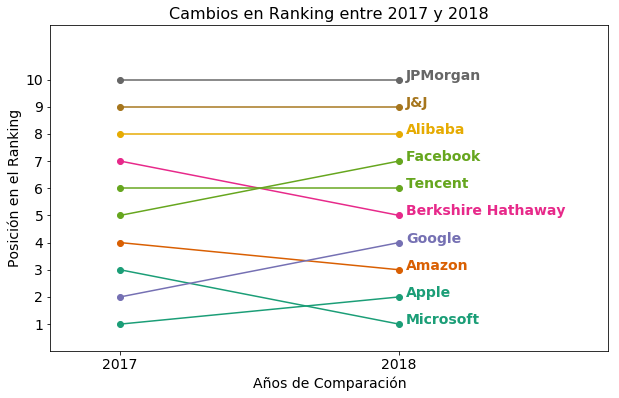

In [92]:
year_init = 2017
year_end = 2018
df_0018 = data[['Ranking',year_init,year_end]]
fig, ax = plt.subplots(figsize=(10,6))
df_0018

color_idx = np.linspace(0, 1, names_df.shape[0]*6)
for j,name in enumerate(df_0018[year_end]):
    color = plt.cm.Dark2(color_idx[j*25])
    ranking_18 = df_0018.loc[df_0018[year_end]==name].Ranking.values[0]
    try:
        ranking_00 = df_0018.loc[df_0018[year_init]==name].Ranking.values[0]
        ax.plot([1,5],[ranking_00, ranking_18], color=color, marker= 'o')
    except:
        ax.scatter(5,ranking_18, color=color)

    ax.text(5.1,ranking_18, name, color=color, weight='bold', fontsize=14)
plt.axis([0,8,0,12])
plt.xticks([1,5],[year_init,year_end], fontsize=14)
plt.yticks(np.arange(1,11), fontsize=14)
plt.ylabel('Posición en el Ranking', fontsize=14)
plt.xlabel('Años de Comparación', fontsize=14)
plt.title('Cambios en Ranking entre {0} y {1}'.format(year_init, year_end), fontsize=16)

print('')

# Otra versión más limpia

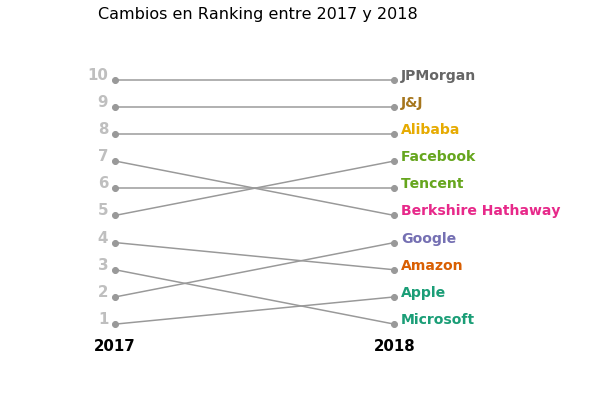

In [127]:
year_init = 2017
year_end = 2018
df_0018 = data[['Ranking',year_init,year_end]]
fig, ax = plt.subplots(figsize=(10,6))
df_0018

color_idx = np.linspace(0, 1, names_df.shape[0]*6)
for j,name in enumerate(df_0018[year_end]):
    color = plt.cm.Dark2(color_idx[j*25])
    ranking_18 = df_0018.loc[df_0018[year_end]==name].Ranking.values[0]
    try:
        ranking_00 = df_0018.loc[df_0018[year_init]==name].Ranking.values[0]
        ax.plot([1,5],[ranking_00, ranking_18], color='0.6', marker= 'o')
    except:
        ax.scatter(5,ranking_18, color=color)

    ax.text(5.1,ranking_18, name, color=color, weight='bold', fontsize=14)
plt.box(on=None)
plt.axis([0,8,0,12])
plt.xticks([1,5],[year_init,year_end], fontsize=14)
#plt.yticks(np.arange(1,11), fontsize=14)
plt.ylabel('Posición en el Ranking', fontsize=14)
plt.xlabel('Años de Comparación', fontsize=14)
plt.title('Cambios en Ranking entre {0} y {1}                          '.format(year_init, year_end), fontsize=16)
plt.axis('off')
plt.text(1,0,year_init, fontsize=15, weight='bold', horizontalalignment='center')
plt.text(5,0,year_end, fontsize=15, weight='bold', horizontalalignment='center')
for i in range(1,11):
     plt.text(1-0.1,i,i, horizontalalignment='right', fontsize=15, weight='bold', color='0.75')
print('')

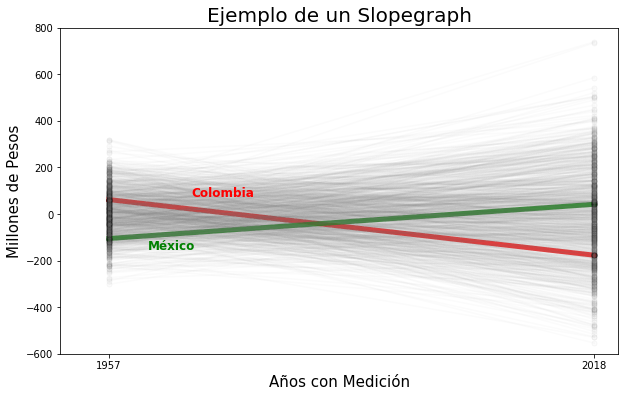

In [1073]:
# simulemos unos datos
N = 1000
# simulemos puntos de partida
np.random.seed(1202)

init_state = 100*np.random.randn(N)
end_state  = 200*np.random.randn(N)

fig, ax = plt.subplots(figsize=(10,6))
counter_g = 0
counter_r = 0
for i in range(N):
    if end_state[i]>init_state[i]:
        plt.plot([0,1],[init_state[i],end_state[i]], color='0.5', alpha=0.03, marker='o', ms=5,  markeredgecolor='k')
        if counter_g==0:
            plt.plot([0,1],[init_state[i],end_state[i]], color='g', alpha=0.8, marker='o', ms=5,  markeredgecolor='k',
                    lw=5)
            plt.text(0.17,75, 'Colombia', color='r',fontsize=12, weight='bold')
        counter_g +=1
        # vamos a resaltar uno:
    else:
        plt.plot([0,1],[init_state[i],end_state[i]], color='0.5', alpha=0.03, marker='o', ms=5,  markeredgecolor='k', 
                )
        if counter_r==0:
            plt.plot([0,1],[init_state[i],end_state[i]], color='r', alpha=0.8, marker='o', ms=5,  markeredgecolor='k',
                    lw=5)
            plt.text(0.08,-150, 'México', color='g',fontsize=12, weight='bold')
        counter_r +=1
        
plt.axis([-0.1,1.05,-600,800])
ax.set_title('Ejemplo de un Slopegraph', fontsize=20)
#plt.yticks([])
ax.set_ylabel('Millones de Pesos', fontsize=15)
ax.set_xlabel('Años con Medición', fontsize=15)
plt.xticks([0,1],[1957,2018])
print('')

# Pregunta: Desde 2000, ¿cuántas veces a entrado en el ranking cada empresa?

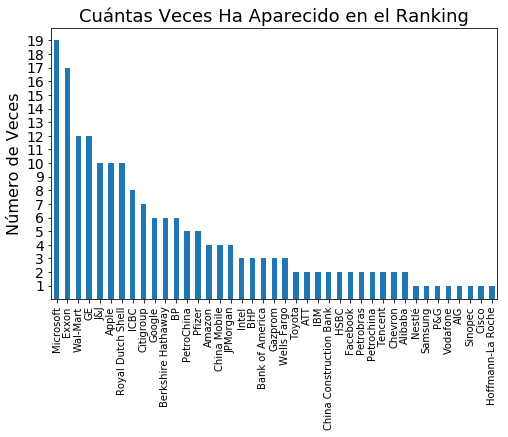

In [164]:
conteo_por_empresa = pd.DataFrame(data[data.columns[1:]].unstack().value_counts())
fig, ax = plt.subplots(figsize=(8,5))
conteo_por_empresa.plot(kind='bar', legend=None, ax = ax)
plt.title('Cuántas Veces Ha Aparecido en el Ranking', fontsize=18)
plt.yticks(np.arange(1,20), fontsize=14)
plt.ylabel('Número de Veces', fontsize=16)
print('')

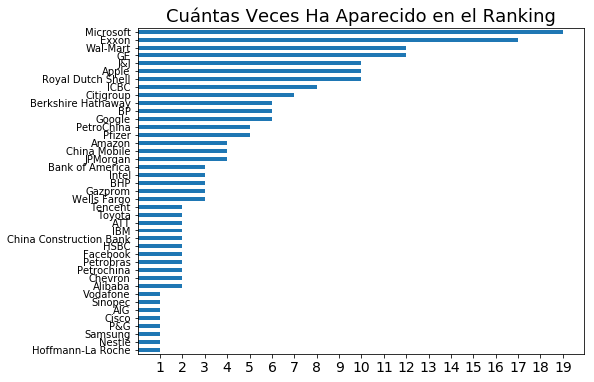

In [176]:
fig, ax = plt.subplots(figsize=(8,6))
conteo_por_empresa.sort_values(by=[0],ascending=True).plot(kind='barh', legend=None, ax = ax)
plt.title('Cuántas Veces Ha Aparecido en el Ranking', fontsize=18)
plt.xticks(np.arange(1,20), fontsize=14)
#plt.ylabel('Número de Veces', fontsize=16)
print('')

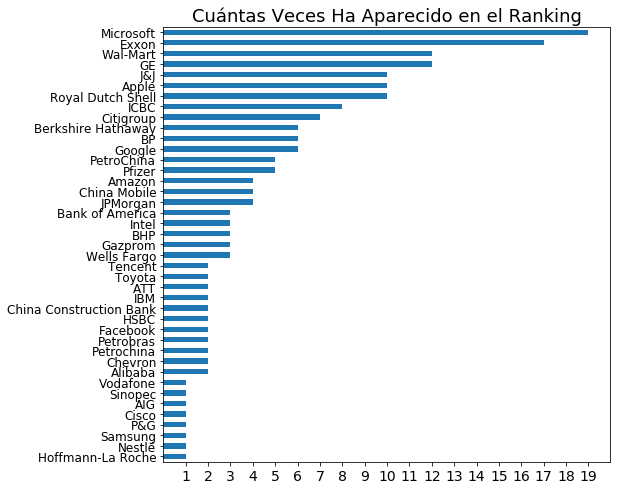

In [178]:
fig, ax = plt.subplots(figsize=(8,8))
conteo_por_empresa.sort_values(by=[0],ascending=True).plot(kind='barh', legend=None, ax = ax)
plt.title('Cuántas Veces Ha Aparecido en el Ranking', fontsize=18)
plt.xticks(np.arange(1,20), fontsize=14)
plt.yticks(fontsize=12)
#plt.ylabel('Número de Veces', fontsize=16)
print('')

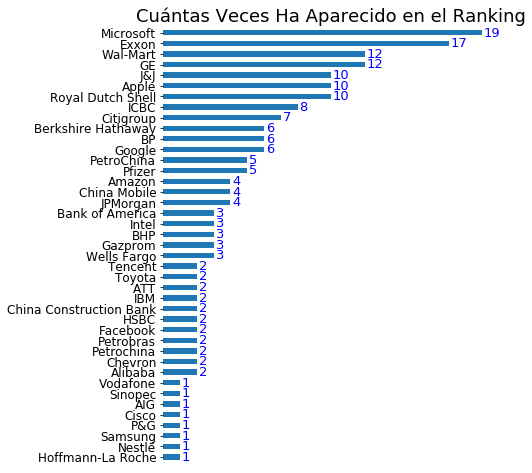

In [217]:
fig, ax = plt.subplots(figsize=(6,8))
reverse_order = conteo_por_empresa.sort_values(by=[0],ascending=True)
reverse_order.plot(kind='barh', legend=None, ax = ax)
plt.title('Cuántas Veces Ha Aparecido en el Ranking', fontsize=18)
plt.xticks(np.arange(1,20), fontsize=14)
plt.yticks(fontsize=12)
#plt.ylabel('Número de Veces', fontsize=16)
plt.box(on=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are offprint('')
# vamos a poner las etiquetas a mano
for i,names in enumerate(reverse_order.index):
    plt.text(reverse_order.loc[names].values[0]+0.1,
         i, reverse_order.loc[names].values[0], verticalalignment='center', fontsize=13, color='b')

# Primer y último año que apareció en ranking

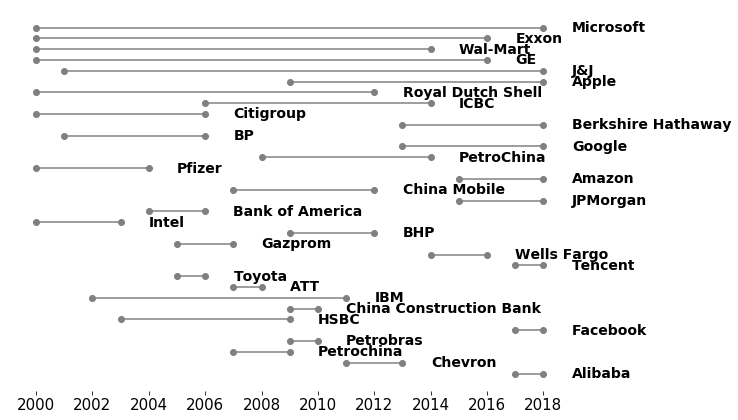

In [294]:
fig, ax = plt.subplots(figsize=(10,7))
counter = 0
for i,names in enumerate(reverse_order.index):
   data_names = (data==names).sum()
   max_year = np.max(np.array(data_names.loc[data_names==1].index))
   min_year = np.min(np.array(data_names.loc[data_names==1].index))
   if max_year>min_year:
      j =3*counter
      ax.plot([min_year,max_year], [j+1,j+1], marker='o', color='0.5')
      ax.text(max_year*1.0005, j+1, names, horizontalalignment='left', verticalalignment = 'center', color='k', fontsize=14,
             weight='bold')
      counter+=1
plt.box(on=None)
plt.yticks([])
plt.xticks(np.arange(2000,2020)[::2],fontsize=15)
#plt.axis([1999,2030,-1,j])
print('')

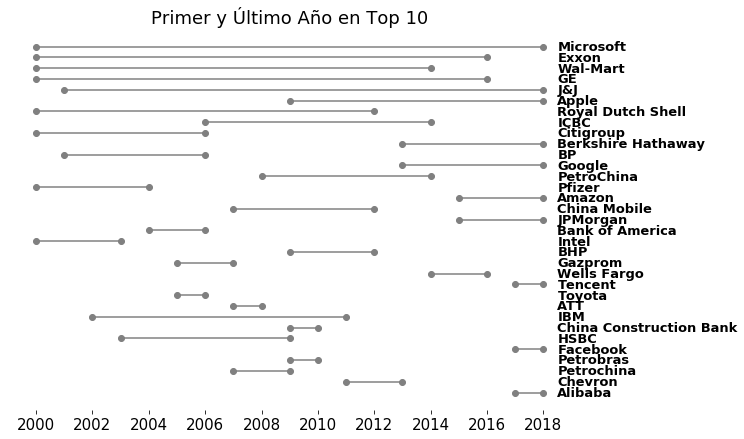

In [971]:
fig, ax = plt.subplots(figsize=(10,7))
counter = 0
for i,names in enumerate(reverse_order.index):
   data_names = (data==names).sum()
   max_year = np.max(np.array(data_names.loc[data_names==1].index))
   min_year = np.min(np.array(data_names.loc[data_names==1].index))
   if max_year>min_year:
      j =3*counter
      ax.plot([min_year,max_year], [j+1,j+1], marker='o', color='0.5')
      ax.text(2018.5, j+1, names, horizontalalignment='left', verticalalignment = 'center', color='k', fontsize=13,
             weight='bold')
      counter+=1
plt.box(on=None)
plt.yticks([])
plt.xticks(np.arange(2000,2020)[::2],fontsize=15)
plt.title('Primer y Último Año en Top 10',fontsize=18)
#plt.axis([1999,2030,-1,j])
print('')

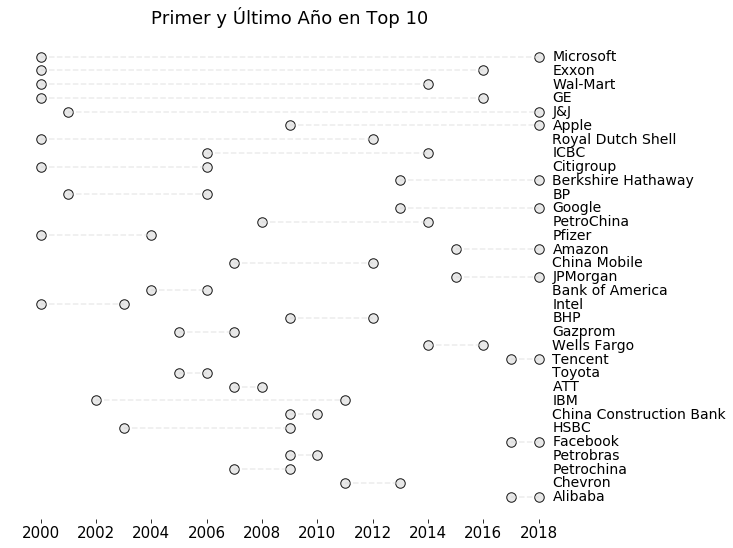

In [998]:
fig, ax = plt.subplots(figsize=(10,9))
counter = 0
for i,names in enumerate(reverse_order.index):
   data_names = (data==names).sum()
   max_year = np.max(np.array(data_names.loc[data_names==1].index))
   min_year = np.min(np.array(data_names.loc[data_names==1].index))
   if max_year>min_year:
      j =5*counter
      ax.plot([min_year,max_year], [j+1,j+1], color='0.85', ls='--', alpha=0.5)
      ax.scatter([min_year], [j+1], marker='o', color='0.9', alpha=0.9, edgecolor='k', s=90)
      ax.scatter([max_year], [j+1], marker='o', color='0.9', alpha=0.9, edgecolor='k', s=90)
      ax.text(2018.5, j+1, names, horizontalalignment='left', verticalalignment = 'center', color='k', fontsize=14,)
             #weight='bold')
      counter+=1
plt.box(on=None)
plt.yticks([])
plt.xticks(np.arange(2000,2020)[::2],fontsize=15)
plt.title('Primer y Último Año en Top 10',fontsize=18)
#plt.axis([1999,2030,-1,j])
print('')

# Podemos mejorar este gráfico incluyendo una tercera dimensión: SECTOR

In [747]:
# vamos a hacer gráficos por sectores
reverse_order['industry'] = ['Pharma','Food processing','Technology','Consumer goods','Technology','Banking','Energy','Telco'
,'Technology','Energy','Energy','Energy','Technology','Banking','Banking','Technology','Telco','Auto','Technology','Banking'
,'Energy','Energy','Technology','Banking','Banking','Telco','Retail','Pharma','Energy','Technology','Energy','Banking',
'Banking','Banking','Energy','Technology','Pharma','Conglomerate','Retail','Energy','Technology']

reverse_order.loc[reverse_order.industry=='Technology']

,0,industry
Samsung,1,Technology
Cisco,1,Technology
Alibaba,2,Technology
Facebook,2,Technology
IBM,2,Technology
Tencent,2,Technology
Intel,3,Technology
Google,6,Technology
Apple,10,Technology
Microsoft,19,Technology


In [ ]:
reverse_order.sort_values(by=['industry'], inplace=True)
color_sector = ['b','r','g','y','m','k','0.15','0.25','0.5','0.75']
color_df = pd.DataFrame(reverse_order.industry.value_counts())
color_df['color_sector'] = color_sector
reverse_order = reverse_order.merge(color_df, left_on = 'industry',right_index=True, how='left')

# Vamos a ordenarlos por sector

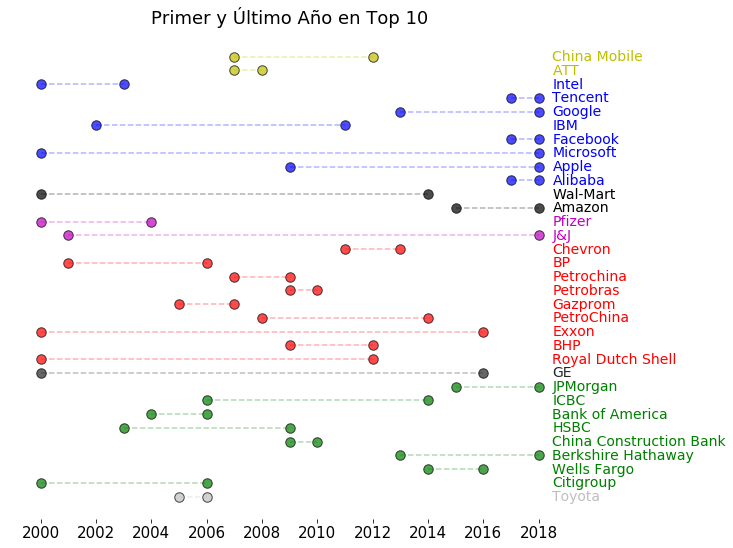

In [1026]:
fig, ax = plt.subplots(figsize=(10,9))
counter = 0
for i,names in enumerate(reverse_order.index):
   color = reverse_order.color_sector.iloc[i]
   data_names = (data==names).sum()
   max_year = np.max(np.array(data_names.loc[data_names==1].index))
   min_year = np.min(np.array(data_names.loc[data_names==1].index))
   if max_year>min_year:
      j =5*counter
      ax.plot([min_year,max_year], [j+1,j+1], color=color, ls='--', alpha=0.3)
      ax.scatter([min_year], [j+1], marker='o', color=color, alpha=0.7, edgecolor='k', s=90)
      ax.scatter([max_year], [j+1], marker='o', color=color, alpha=0.7, edgecolor='k', s=90)
      ax.text(2018.5, j+1, names, horizontalalignment='left', verticalalignment = 'center', color=color, fontsize=14,)
             #weight='bold')
      counter+=1
plt.box(on=None)
plt.yticks([])
plt.xticks(np.arange(2000,2020)[::2],fontsize=15)
plt.title('Primer y Último Año en Top 10',fontsize=18)
#plt.axis([1999,2030,-1,j])
print('')

In [688]:
conteo_industria = pd.DataFrame(reverse_order[0].groupby(reverse_order.industry).sum())
conteo_industria

,0
industry,
Auto,2
Banking,36
Conglomerate,12
Consumer goods,1
Energy,51
Food processing,1
Pharma,16
Retail,16
Technology,48


# Probemos primero con un gráfico de Pie

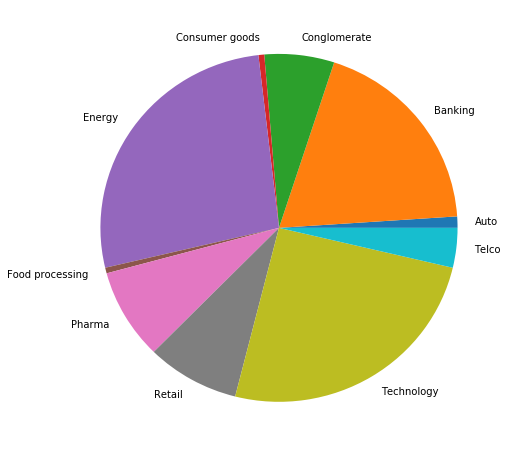

In [689]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(conteo_industria[0], labels = conteo_industria.index, startangle=0)
print('')

## ¿Les gusta?  ¿Cuál era el objetivo del gráfico? ¿Lo logra?


# Vamos a probar ahora con barras

In [383]:
cm_subsection = np.linspace(0,1,conteo_industria.shape[0]) 
colors = [plt.cm.jet(x) for x in cm_subsection]

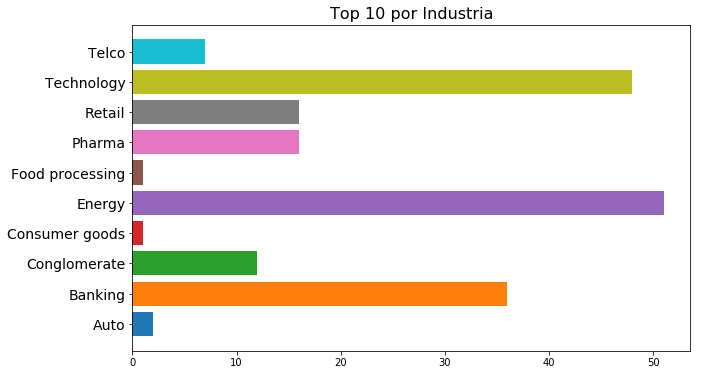

In [690]:
# ahora ordenadito
fig, ax = plt.subplots(figsize=(10,6))
#conteo_industria.plot(kind='barh', color = colors[3], legend=None, ax=ax)
for i,color in enumerate(range(conteo_industria.shape[0])):
   plt.barh(i,conteo_industria.iloc[i,0])
plt.title('Top 10 por Industria', fontsize=16)
plt.ylabel('')
plt.yticks(np.arange(conteo_industria.shape[0]), conteo_industria.index, fontsize=14)
print('')

# ¿Qué rol juegan los colores?  Ninguno, es puramente decorativo

# Y por lo tanto distrae, eliminémoslos

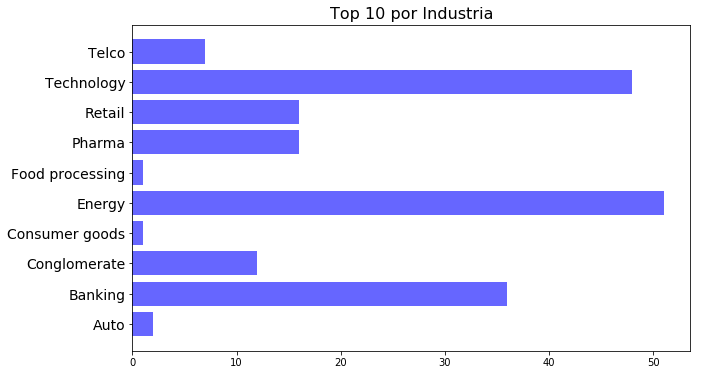

In [691]:
# ahora ordenadito
fig, ax = plt.subplots(figsize=(10,6))
#conteo_industria.plot(kind='barh', color = colors[3], legend=None, ax=ax)
for i,color in enumerate(range(conteo_industria.shape[0])):
   plt.barh(i,conteo_industria.iloc[i,0], color='b', alpha=0.6)
plt.title('Top 10 por Industria', fontsize=16)
plt.ylabel('')
plt.yticks(np.arange(conteo_industria.shape[0]), conteo_industria.index, fontsize=14)
print('')

# Todavía se puede mejorar: ordenémoslo de mayor a menor

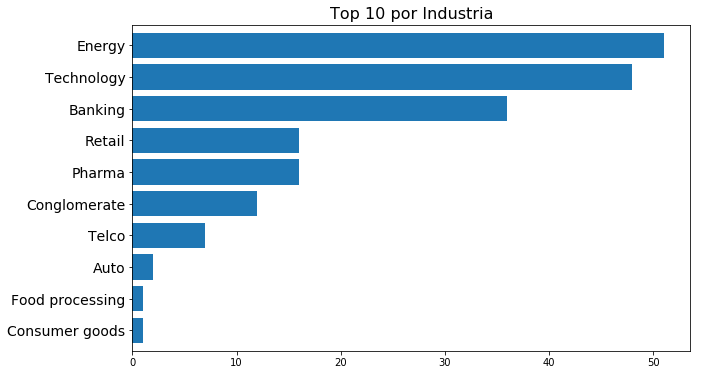

In [692]:
fig, ax = plt.subplots(figsize=(10,6))
conteo_industria.sort_values(by=0).plot(kind='barh', legend=None, ax = ax, width=0.8)
plt.yticks(fontsize=14)
plt.title('Top 10 por Industria', fontsize=16)
plt.ylabel('')
print('')

# Eliminemos el exceso de detalles que siguen distrayendo y no aportan nada a la visualización

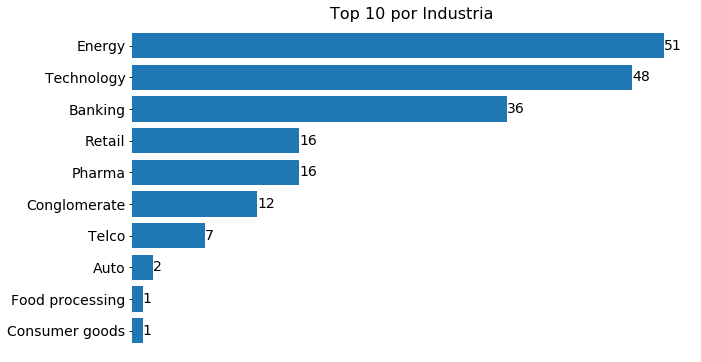

In [693]:
fig, ax = plt.subplots(figsize=(10,6))
conteo_industria.sort_values(by=0).plot(kind='barh', legend=None, ax = ax, width=0.8)
for i in range(conteo_industria.shape[0]):
    plt.text(conteo_industria.sort_values(by=0).iloc[i,0],i,conteo_industria.sort_values(by=0).iloc[i,0],
            fontsize=14, verticalalignment='center', horizontalalignment='left')
plt.yticks(fontsize=14)
plt.title('Top 10 por Industria', fontsize=16)
plt.ylabel('')
plt.box(on=None)
plt.xticks([])
print('')

# Vamos a transformar los datos para probar unas nuevas visualizaciones

In [701]:
# tenemos que transformar nuestra matriz de datos originales, que tenían nombres de empresas a etiquetas de industria
# de cada empresa
dict_industry = reverse_order['industry'].to_dict()
data_industry = data.copy()
for col in data.columns[1:]:
    data_industry[col] = data_industry[col].map(dict_industry)
# cambiemos el índice para que el ranking no sea una columna adicional
#data_industry.set_index(data_industry.Ranking, inplace=True)
#data_industry = data_industry[data_industry.columns[1:]]
data_industry.head(10)

,Ranking,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Conglomerate,Conglomerate,Technology,Conglomerate,Conglomerate,Energy,Energy,Energy,Energy,Energy,Energy,Energy,Technology,Technology,Technology,Technology,Technology,Technology,Technology
1,2,Technology,Technology,Conglomerate,Technology,Energy,Conglomerate,Conglomerate,Energy,Energy,Energy,Energy,Technology,Energy,Energy,Energy,Technology,Technology,Technology,Technology
2,3,Energy,Energy,Energy,Energy,Technology,Technology,Technology,Conglomerate,Retail,Technology,Technology,Energy,Energy,Technology,Technology,Technology,Technology,Technology,Retail
3,4,Pharma,Retail,Retail,Pharma,Banking,Banking,Banking,Telco,Telco,Banking,Energy,Energy,Energy,Technology,Banking,Banking,Banking,Retail,Technology
4,5,Technology,Banking,Pharma,Banking,Energy,Energy,Energy,Banking,Consumer goods,Retail,Technology,Banking,Banking,Banking,Technology,Energy,Energy,Technology,Banking
5,6,Retail,Pharma,Banking,Retail,Retail,Banking,Banking,Technology,Banking,Banking,Banking,Technology,Telco,Conglomerate,Energy,Retail,Retail,Technology,Technology
6,7,Banking,Technology,Pharma,Banking,Energy,Energy,Auto,Energy,Technology,Energy,Energy,Technology,Retail,Pharma,Pharma,Conglomerate,Pharma,Banking,Technology
7,8,Telco,Energy,Energy,Technology,Pharma,Retail,Banking,Energy,Telco,Banking,Banking,Energy,Technology,Retail,Banking,Pharma,Banking,Technology,Technology
8,9,Technology,Pharma,Energy,Energy,Pharma,Auto,Energy,Telco,Pharma,Energy,Energy,Retail,Technology,Pharma,Retail,Banking,Conglomerate,Pharma,Pharma
9,10,Energy,Energy,Technology,Banking,Banking,Energy,Energy,Energy,Conglomerate,Technology,Food processing,Telco,Energy,Energy,Banking,Banking,Banking,Banking,Banking


In [709]:
industria_anio_max = pd.DataFrame(index = conteo_industria.index)
industria_anio_min = pd.DataFrame(index = conteo_industria.index)
industria_anio_count = pd.DataFrame(index = conteo_industria.index)
for anyo in data.columns[1:]:
    #Primero el max
    df_anyo_max = pd.DataFrame(data_industry.Ranking.groupby(data_industry[anyo]).max().astype('int'))
    df_anyo_max.index.name = 'industry'
    df_anyo_max.rename(columns={'Ranking':anyo}, inplace=True)
    industria_anio_max = industria_anio_max.merge(df_anyo_max, how='left', left_index=True, right_index=True)
    #Primero el min
    df_anyo = pd.DataFrame(data_industry.Ranking.groupby(data_industry[anyo]).min().astype('int'))
    df_anyo.index.name = 'industry'
    df_anyo.rename(columns={'Ranking':anyo}, inplace=True)
    industria_anio_min = industria_anio_min.merge(df_anyo, how='left', left_index=True, right_index=True)
    #Ahora conteos
    df_anyo = pd.DataFrame(data_industry.Ranking.groupby(data_industry[anyo]).count().astype('int'))
    df_anyo.index.name = 'industry'
    df_anyo.rename(columns={'Ranking':anyo}, inplace=True)
    industria_anio_count = industria_anio_count.merge(df_anyo, how='left', left_index=True, right_index=True)

# anyos en filas- industria en columnas
industria_anio_min = industria_anio_min.T
industria_anio_max = industria_anio_max.T
industria_anio_count = industria_anio_count.T

# Probemos un heatmap: ver los mejores años de cada sector

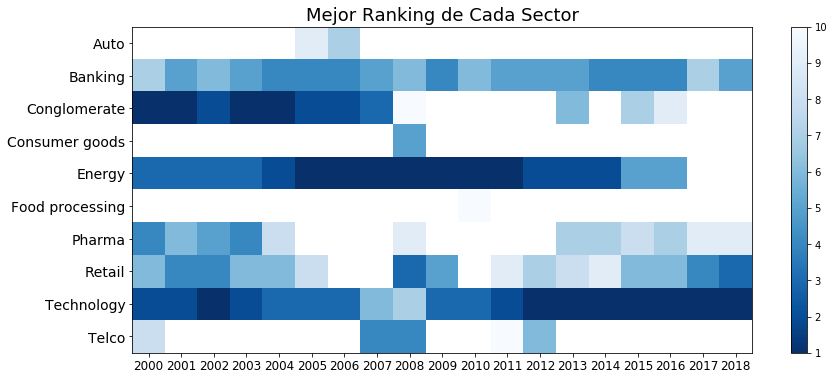

In [727]:
fig, ax = plt.subplots(figsize=(14,6))
myfig = ax.imshow(industria_anio_min.T, vmin=1, vmax=10, cmap=plt.cm.Blues_r)
fig.colorbar(myfig)
# We want to show all ticks...
ax.set_xticks(np.arange(industria_anio_min.index.shape[0]))
ax.set_yticks(np.arange(industria_anio_min.columns.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(industria_anio_min.index, fontsize=12)
ax.set_yticklabels(industria_anio_min.columns, fontsize=14)
# incluir un colorbar
plt.title('Mejor Ranking de Cada Sector', fontsize=18)
print('')

# La barra de colores puede no ser lamejor opción

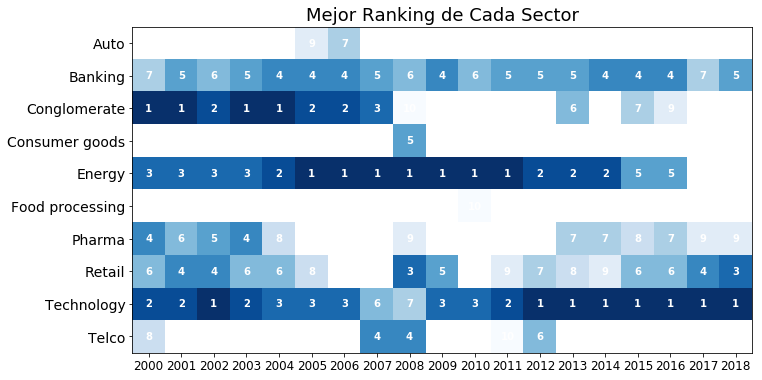

In [970]:
fig, ax = plt.subplots(figsize=(14,6))
ax.imshow(industria_anio_min.T, interpolation=None, vmin=1, vmax=10, cmap = plt.cm.Blues_r)
# We want to show all ticks...
ax.set_xticks(np.arange(industria_anio_min.index.shape[0]))
ax.set_yticks(np.arange(industria_anio_min.columns.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(industria_anio_min.index, fontsize=12)
ax.set_yticklabels(industria_anio_min.columns, fontsize=14)
# ahora los valores
for i in range(industria_anio_min.index.shape[0]):
    for j in range(industria_anio_min.columns.shape[0]):
        if np.isnan(industria_anio_min.iloc[i, j]) == False:
           text = ax.text(i, j, int(industria_anio_min.iloc[i, j]),
                          ha="center", va="center", color="w", weight='bold')
plt.title('Mejor Ranking de Cada Sector', fontsize=18)
print('')

# Veamos el sector de tecnología específicamente

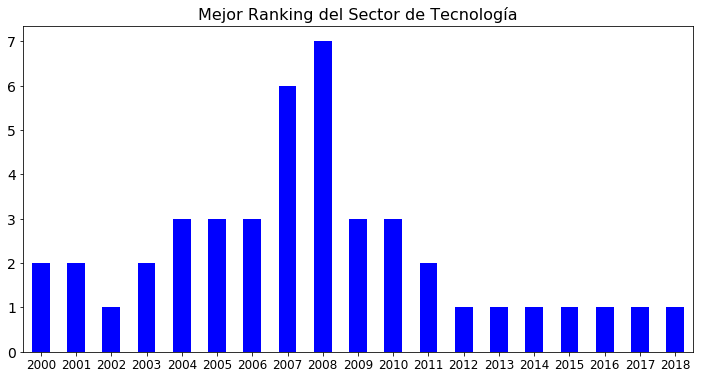

In [698]:
fig, ax = plt.subplots(figsize=(12,6))
industria_anio_min.Technology.plot(kind='bar', color='b')
plt.xticks(rotation=0, fontsize=12)
plt.title('Mejor Ranking del Sector de Tecnología', fontsize=16)
plt.yticks(fontsize=14)
print('')

# Limpiémoslo un poco

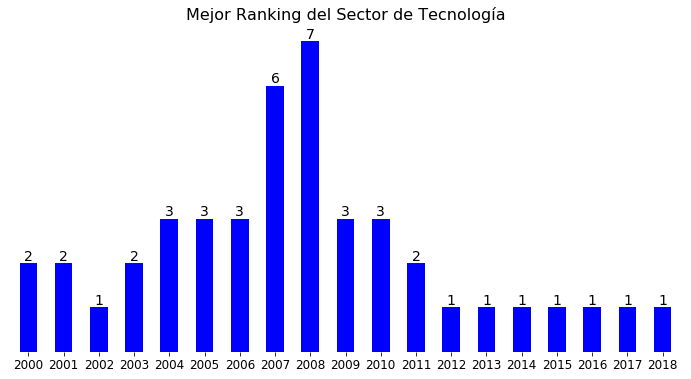

In [699]:
fig, ax = plt.subplots(figsize=(12,6))
industria_anio_min.Technology.plot(kind='bar', color='b')
plt.xticks(rotation=0, fontsize=12)
plt.title('Mejor Ranking del Sector de Tecnología', fontsize=16)
plt.yticks(fontsize=14)
plt.box(on=None)
for i in range(industria_anio_min.Technology.shape[0]):
    if np.isnan(industria_anio_min.Technology.iloc[i])==False:
        plt.text(i,industria_anio_min.Technology.iloc[i],int(industria_anio_min.Technology.iloc[i]),
                fontsize=14,verticalalignment='bottom', horizontalalignment='center')
plt.yticks([])
print('')

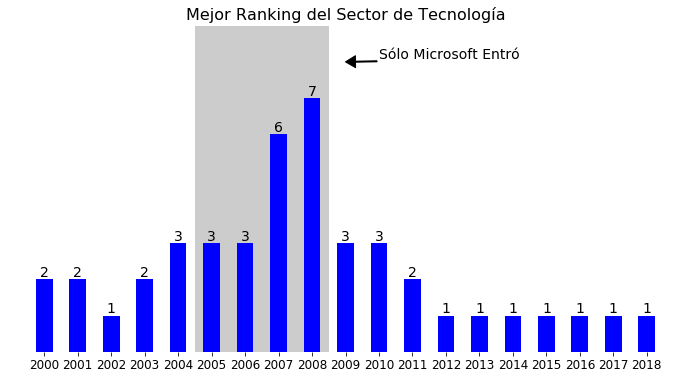

In [768]:
fig, ax = plt.subplots(figsize=(12,6))
industria_anio_min.Technology.plot(kind='bar', color='b')
plt.xticks(rotation=0, fontsize=12)
plt.title('Mejor Ranking del Sector de Tecnología', fontsize=16)
plt.yticks(fontsize=14)
plt.box(on=None)
for i in range(industria_anio_min.Technology.shape[0]):
    if np.isnan(industria_anio_min.Technology.iloc[i])==False:
        plt.text(i,industria_anio_min.Technology.iloc[i],int(industria_anio_min.Technology.iloc[i]),
                fontsize=14,verticalalignment='bottom', horizontalalignment='center')
x = np.arange(-2,19,0.5)
y = 12*np.ones(21*2)
plt.fill_between(x, y, where=np.logical_and(x>4,x<9),facecolor='k', alpha=0.2)
ax.annotate('Sólo Microsoft Entró', xy=(9, 8), xytext=(10, 8.1),
            arrowprops=dict(facecolor='black', shrink=10, width=1, headlength=10),
            fontsize=14
            )
plt.yticks([])
plt.axis([-1,19,0,9])
print('')

In [767]:
# Normalicemos los conteos: los voy a utilizar para incluir una dimensión adicional: ancho de barras
count_tecnology_norm = (industria_anio_count.Technology-0.5)/(industria_anio_count.Technology.max()-0.5)

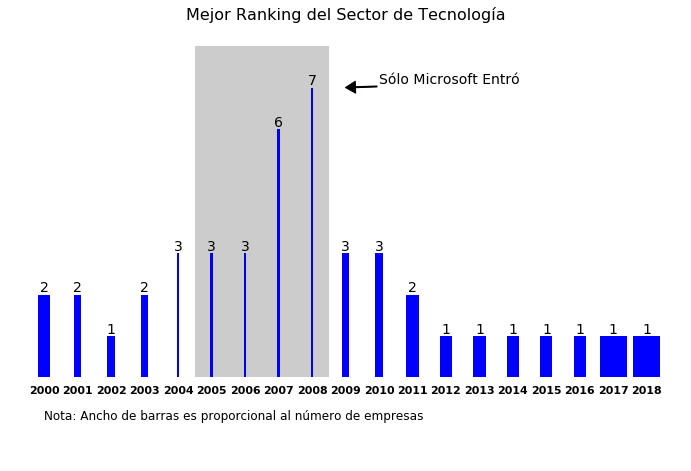

In [1075]:
fig, ax = plt.subplots(figsize=(12,8))
#industria_anio_min.Technology.plot(kind='bar', color='b', width= count_tecnology_norm.values)
ax.bar(industria_anio_min.Technology.index, industria_anio_min.Technology,
        color='b', width= 0.8*count_tecnology_norm.values)

#plt.xticks(industria_anio_min.Technology.index,industria_anio_min.Technology.index,rotation=0, fontsize=12)
plt.xticks([])
plt.title('Mejor Ranking del Sector de Tecnología', fontsize=16)
plt.yticks(fontsize=14)
plt.box(on=None)

for i,val in enumerate(industria_anio_min.Technology.values):
    if np.isnan(val)==False:
        plt.text(industria_anio_min.Technology.index[i],
                 industria_anio_min.Technology.iloc[i],int(industria_anio_min.Technology.iloc[i]),
                fontsize=14,verticalalignment='bottom', horizontalalignment='center')
x = np.arange(1998,2019,0.5)
y = 8*np.ones(21*2)
plt.fill_between(x, y, where=np.logical_and(x>2004,x<2009),facecolor='k', alpha=0.2)
ax.annotate('Sólo Microsoft Entró', xy=(2009, 7), xytext=(2010, 7.1),
            arrowprops=dict(facecolor='black', shrink=10, width=1, headlength=10),
            fontsize=14
            )
plt.yticks([])
plt.axis([1999,2019,-2,8.5])
for i in range(2000,2019):
    plt.text(i,-0.3,i, fontsize=11, verticalalignment='center', horizontalalignment='center', weight='bold')
plt.text(2000,-1,'Nota: Ancho de barras es proporcional al número de empresas', fontsize=12)
print('')

# Probemos con líneas

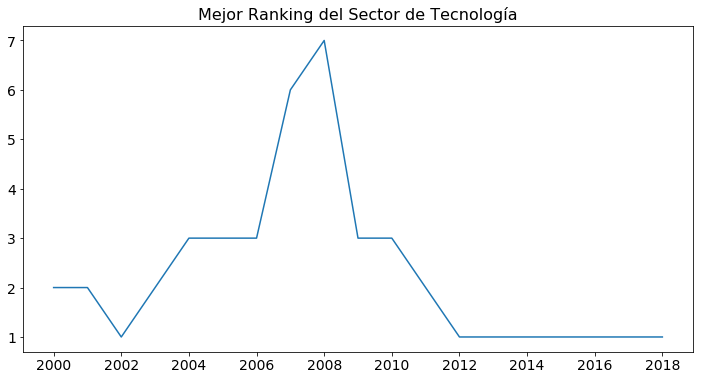

In [788]:
fig, ax = plt.subplots(figsize=(12,6))
industria_anio_min.Technology.plot( ax=ax)
plt.xticks(np.arange(2000,2019)[::2],np.arange(2000,2019)[::2], fontsize=14)
plt.title('Mejor Ranking del Sector de Tecnología', fontsize=16)
plt.yticks(fontsize=14)
print('')

# Generalmente, los gráficos de líneas son mejores para representar series de tiempo

**La razón**: las líneas son *contínuas*, como el tiempo, y uno quiere dar esa sensación de continuidad en el gráfico.

El ojo humano lo entiende mejor

# En este caso no se ve muy bien, incluso si mejoramos la presentación

# La gente suele utilizar gráficos de barras para hacer comparaciones entre dos variables.

### Por ejemplo: ¿Hay alguna relación entre el número de empresas de tecnología que entraron al ranking, y el mejor ranking del sector?

Text(0.5,1,'Relación Entre Mejor Lugar y Número de Empresas: Tecnología')

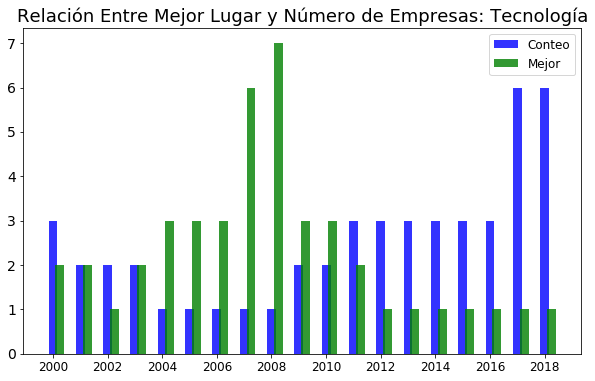

In [822]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(industria_anio_count.Technology,industria_anio_min.Technology)
count_fig = ax.bar(np.arange(industria_anio_count.shape[0]*4)[::4], industria_anio_count.Technology, color='b', width=1.3,
        alpha=0.8, label='Conteo')
min_fig = ax.bar(np.arange(industria_anio_count.shape[0]*4)[1::4], industria_anio_min.Technology, color='g', width=1.3,
        alpha=0.8, label='Mejor')
plt.xticks(np.arange(industria_anio_count.shape[0]*4)[::4][::2], industria_anio_count.index[::2], fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Relación Entre Mejor Lugar y Número de Empresas: Tecnología', fontsize=18)

# Limpiémosla un poco y saquemos la leyenda

Text(62,6.1,'Conteo')

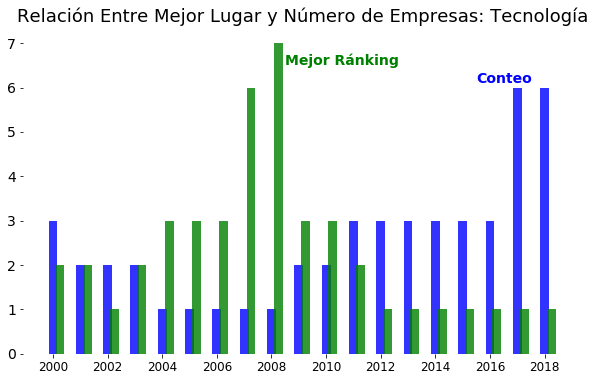

In [830]:
fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(industria_anio_count.Technology,industria_anio_min.Technology)
count_fig = ax.bar(np.arange(industria_anio_count.shape[0]*4)[::4], industria_anio_count.Technology, color='b', width=1.3,
        alpha=0.8, label='Conteo')
min_fig = ax.bar(np.arange(industria_anio_count.shape[0]*4)[1::4], industria_anio_min.Technology, color='g', width=1.3,
        alpha=0.8, label='Mejor')
plt.xticks(np.arange(industria_anio_count.shape[0]*4)[::4][::2], industria_anio_count.index[::2], fontsize=12)
plt.title('Relación Entre Mejor Lugar y Número de Empresas: Tecnología', fontsize=18)
plt.box(on=None)
plt.yticks(fontsize=14)
print('')
plt.text(8*4+2, 6.5, 'Mejor Ránking', color='g', weight='bold', fontsize=14)
plt.text(15*4+2, 6.1, 'Conteo', color='b', weight='bold', fontsize=14)

# Miremos ahora un último tipo de gráfico: XY o scatterplots

## Generalmente son más útiles para encontrar relaciones entre dos variables

Text(0.5,1,'Relación Entre Mejor Lugar y Número de Empresas: Tecnología')

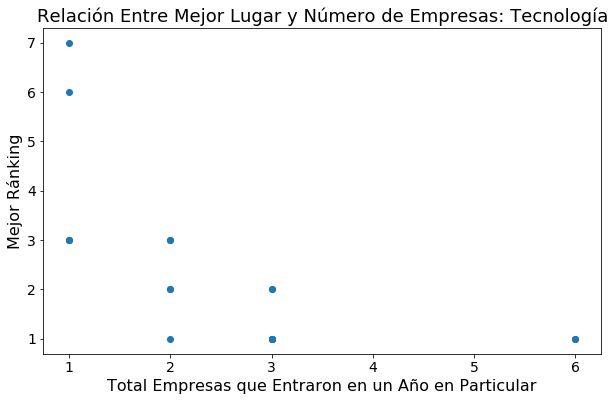

In [857]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(industria_anio_count.Technology,industria_anio_min.Technology)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Total Empresas que Entraron en un Año en Particular', fontsize=16)
plt.ylabel('Mejor Ránking', fontsize=16)
plt.title('Relación Entre Mejor Lugar y Número de Empresas: Tecnología', fontsize=18)

# Teníamos 18 años de información, pero la visualización muestra sólo la mitad de puntos

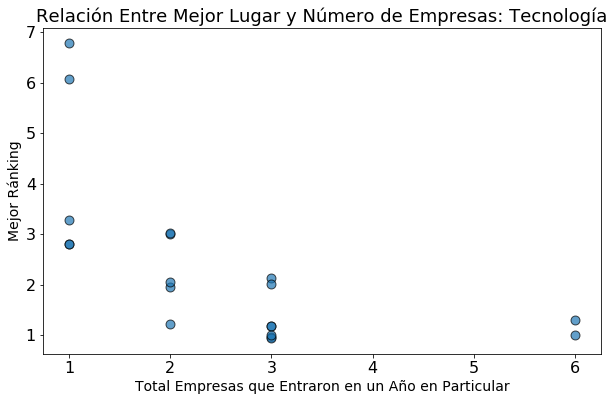

In [859]:
fig, ax = plt.subplots(figsize=(10,6))
# vamos a meterle un poco de ruido para ver distintos años
x_var = industria_anio_count.Technology
y_var = industria_anio_min.Technology + 0.15*np.random.randn(industria_anio_min.Technology.shape[0])
ax.scatter(x_var,y_var, alpha=0.7, s=80, edgecolor='k')
plt.xlabel('Total Empresas que Entraron en un Año en Particular', fontsize=14)
plt.ylabel('Mejor Ránking', fontsize=14)
plt.title('Relación Entre Mejor Lugar y Número de Empresas: Tecnología', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
print('')

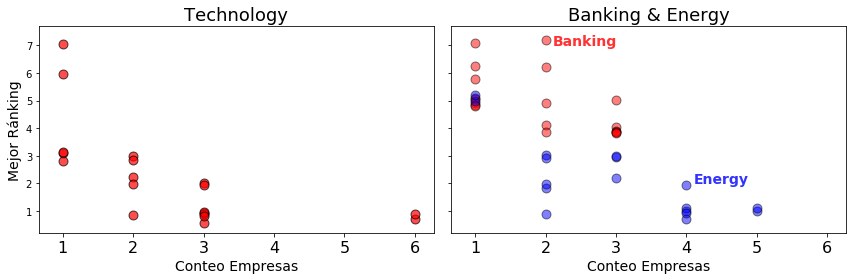

In [907]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
# Empecemos con tecnología
x_var = industria_anio_count.Technology
y_var = industria_anio_min.Technology + 0.15*np.random.randn(industria_anio_min.Technology.shape[0])
ax[0].scatter(x_var,y_var, alpha=0.7, s=80, edgecolor='k', color='r')
labels = [str(i) for i in range(0,9)]
ax[0].set_xticklabels(labels,fontsize=16)
ax[0].set_title('Technology', fontsize=18)
ax[0].set_ylabel('Mejor Ránking', fontsize=14)
ax[0].set_xlabel('Conteo Empresas', fontsize=14)

# Ahora Banking y Energy
x_var = industria_anio_count.Banking
y_var = industria_anio_min.Banking + 0.15*np.random.randn(industria_anio_min.Technology.shape[0])
ax[1].scatter(x_var,y_var, alpha=0.5, s=80, edgecolor='k', color='r')
x_var = industria_anio_count.Energy
y_var = industria_anio_min.Energy + 0.15*np.random.randn(industria_anio_min.Technology.shape[0])
ax[1].scatter(x_var,y_var, alpha=0.5, s=80, edgecolor='k', color='b')
ax[1].set_title('Banking & Energy', fontsize=18)
ax[1].set_xlabel('Conteo Empresas', fontsize=14)
ax[1].text(2.1,7,'Banking',color='r', weight='bold', fontsize=14, alpha=0.8)
ax[1].text(4.1,2,'Energy',color='b', weight='bold', fontsize=14, alpha=0.8)
ax[1].set_xticklabels(labels,fontsize=16)
#plt.xlabel('Total Empresas que Entraron en un Año en Particular', fontsize=14)
#plt.title('Relación Entre Mejor Lugar y Número de Empresas: Banking', fontsize=18)
#plt.yticks(fontsize=16)
plt.tight_layout()
print('')

# Parece haber una relación negativa entre las dos variables.

1. ¿Por qué creen que pasa?
2. Vamos a graphicar un XY con todos los sectores

Text(0.5,0,'Conteo Empresas')

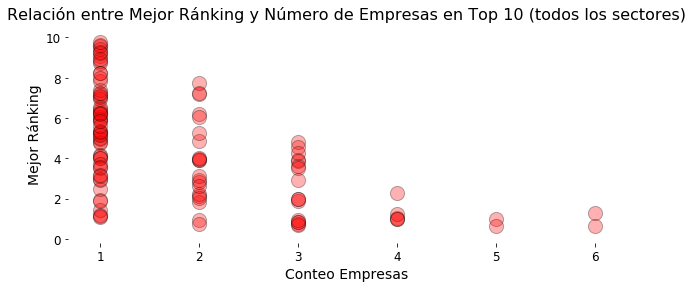

In [925]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True, sharex=True)
# Empecemos con tecnología
for i,sector in enumerate(industria_anio_count.columns):
    x_var = industria_anio_count[sector]
    y_var = industria_anio_min[sector] + 0.25*np.random.randn(industria_anio_min.Technology.shape[0])
    ax.scatter(x_var,y_var, alpha=0.3, s=200, edgecolor='k', color='r')
plt.box(on=None)
plt.title('Relación entre Mejor Ránking y Número de Empresas en Top 10 (todos los sectores)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mejor Ránking', fontsize=14)
plt.xlabel('Conteo Empresas', fontsize=14)

# Jugar con la transparencia de los colores es útil cuando hay elementos que se superponen.

# En los gráficos de arriba es claro cuando dos marcadores se superponen: el color es cada vez más oscuro

[0.8, 6.2, -0.2, 12]

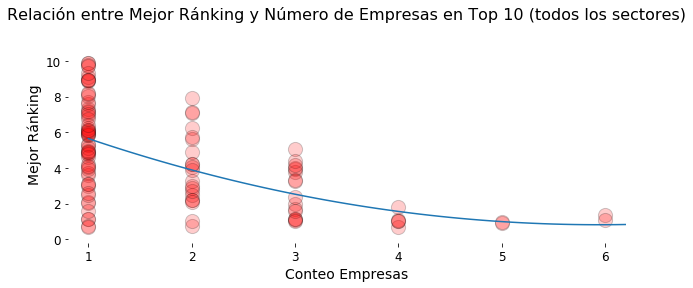

In [959]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True, sharex=True)
# Empecemos con tecnología
for i,sector in enumerate(industria_anio_count.columns):
    x_var = industria_anio_count[sector]
    y_var = industria_anio_min[sector] + 0.25*np.random.randn(industria_anio_min.Technology.shape[0])
    ax.scatter(x_var,y_var, alpha=0.2, s=200, edgecolor='k', color='r')
# Incluyamos también una línea de regresión
nobs = industria_anio_count.unstack().shape[0]
conteo = industria_anio_count.unstack().values.reshape((nobs,1))
mejor = industria_anio_min.unstack().values.reshape((nobs,1))
totalmat_sin_nans = pd.DataFrame(np.concatenate((mejor, np.ones((nobs,1)), conteo, conteo**2), axis=1)).dropna()
nobs = totalmat_sin_nans.shape[0]
ymat = totalmat_sin_nans[0].values.reshape((nobs,1))
xmat = totalmat_sin_nans[[1,2,3]]
beta = np.dot(np.linalg.inv(np.dot(xmat.T,xmat)),np.dot(xmat.T,ymat))
xlin = np.arange(1,7,0.1)
nobs_lin = xlin.shape[0]
xmathat = np.concatenate((np.ones((nobs_lin,1)),xlin.reshape((nobs_lin,1)),(xlin**2).reshape((nobs_lin,1))),axis=1)
yhat = np.dot(xmathat,beta)
ax.plot(xlin,yhat)

plt.box(on=None)
plt.title('Relación entre Mejor Ránking y Número de Empresas en Top 10 (todos los sectores)', fontsize=16)
plt.yticks(np.arange(0,11)[::2],np.arange(0,11)[::2],fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mejor Ránking', fontsize=14)
plt.xlabel('Conteo Empresas', fontsize=14)
plt.axis([0.8,6.2,-0.2,12])